In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import plotly.express as px

In [2]:
df1 = pd.read_csv("IPL Matches 2008-2020.csv")
df2 = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [9]:
df1.team1.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
df1.team2.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
df1.toss_winner.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
df1.winner.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)

In [13]:
df1['date'] = pd.to_datetime(df1.date)

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '18-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '19-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '20-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '21-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '22-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\conda_tmp\ipykernel_10232\541904987.py:1: UserWarning:

Parsing '23-04-2008' in DD/MM/YYYY format

In [19]:
df1['season'] = df1.date.dt.year

In [22]:
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [25]:
df1.venue.nunique()


36

In [30]:
df2[['bowler','batsman','non_striker']].nunique()

bowler         420
batsman        537
non_striker    530
dtype: int64

In [39]:
pd.concat([df2.bowler, df2.batsman],axis = 0).nunique()

580

In [40]:
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [51]:
matches_over_years = df1.season.value_counts().sort_index()
matches_over_years

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: season, dtype: int64

In [61]:
px.line(x = matches_over_years.index , y = matches_over_years.values,markers=  True)

In [63]:
px.line(x = matches_over_years.index , y = matches_over_years.values,markers=  True, labels=dict(x = 'Years', y = 'Matches'))

In [ ]:
def matches_over_years(df):
    temp_df  = df1.season.value_counts()
    return px.line(x = temp_df.index , y = temp_df.values,markers=  True, labels=dict(x = 'Years', y = 'Matches'))

In [82]:
temp_df  = df1.season.value_counts().sort_index()
fig = px.bar(x  = temp_df.values , y = temp_df.index, labels=dict(x = 'Years', y = 'Matches'))
fig.update_xaxes(range=[50,80])

In [73]:
df1.groupby('season')['team1'].nunique()

season
2008     8
2009     7
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
2020     8
Name: team1, dtype: int64

In [74]:
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [77]:
season_data = df1[['id','season']].merge(df2,on = 'id', how = 'left')
season_data

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [79]:
season_score= season_data.groupby('season')['total_runs'].sum()
season_score

season
2008    17937
2009    16320
2010    18864
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64

In [86]:
def score_over_seasons(df1,df2):
    temp_df = df1[['id','season']].merge(df2,on = 'id', how = 'left')
    temp_df = temp_df.groupby('season')['total_runs'].sum()
    fig = px.bar(x = temp_df.index, y = temp_df.values,labels=dict(x = 'season', y = 'Score'))
    return fig 

In [87]:
score_over_seasons(df1,df2)

In [104]:
def toss_winners(df,year):
    if year == 'Overall':
      temp_df = df1.toss_winner.value_counts() / df1.groupby('team1').count()
    elif year != "Overall":
      temp_df = df1[df1.season == year].toss_winner.value_counts().sort_values(ascending = True)
      
    fig = px.bar(x = temp_df.values, y = temp_df.index, labels=dict(x = "Toss wins",y = "Team"))
      
    return fig

In [106]:
toss_winners(df1,2020)

In [140]:
temp_df = df1.team1.append(df1.team2).reset_index()
temp_df.drop(['index'] , axis = 1, inplace = True
             )
temp_df.rename(columns = {0:'team'},inplace = True)

matches_of_each_team = temp_df.team.value_counts()

C:\conda_tmp\ipykernel_10232\3667084612.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [147]:
def selected_year(df,year):
    temp_df = df[df.season == year].team1.append(df[df.season==year].team2).reset_index()
    temp_df.drop(['index'] , axis = 1, inplace = True
                )
    temp_df.rename(columns = {0:'team'},inplace = True)

    matches_of_team_for_specific_year = temp_df.team.value_counts()
    return matches_of_team_for_specific_year

In [148]:
selected_year(df1,2020)

C:\conda_tmp\ipykernel_10232\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Delhi Capitals                 17
Mumbai Indians                 16
Sunrisers Hyderabad            16
Royal Challengers Bangalore    15
Kolkata Knight Riders          14
Rajasthan Royals               14
Kings XI Punjab                14
Chennai Super Kings            14
Name: team, dtype: int64

team1
Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant          14
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
Name: id, dtype: int64

In [141]:
df1.toss_winner.value_counts() / matches_of_each_team

Chennai Super Kings            0.544944
Deccan Chargers                0.573333
Delhi Capitals                 0.606061
Delhi Daredevils               0.496894
Gujarat Lions                  0.500000
Kings XI Punjab                0.447368
Kochi Tuskers Kerala           0.571429
Kolkata Knight Riders          0.510417
Mumbai Indians                 0.522167
Pune Warriors                  0.434783
Rajasthan Royals               0.540373
Rising Pune Supergiant         0.433333
Royal Challengers Bangalore    0.446154
Sunrisers Hyderabad            0.459677
dtype: float64

In [151]:
def toss_winners(df,year):
    if year == 'Overall':
      temp_df = ((df1.toss_winner.value_counts() / matches_of_each_team) * 100).sort_values(ascending = True)
    elif year != "Overall":
      temp_df = ((df1[df1.season == year].toss_winner.value_counts() / selected_year(df1,year))*100).sort_values(ascending = True)
      
    fig = px.bar(x = temp_df.values, y = temp_df.index, labels=dict(x = "Toss winning %",y = "Team"))
      
    return fig

In [153]:
toss_winners(df1,2019)

C:\conda_tmp\ipykernel_10232\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [155]:
selected_year(df1,2020)

C:\conda_tmp\ipykernel_10232\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Delhi Capitals                 17
Mumbai Indians                 16
Sunrisers Hyderabad            16
Royal Challengers Bangalore    15
Kolkata Knight Riders          14
Rajasthan Royals               14
Kings XI Punjab                14
Chennai Super Kings            14
Name: team, dtype: int64

In [159]:
years = df1.season.unique().tolist()
years.insert(0,'Overall') 
years

['Overall',
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [164]:
(df1.winner.value_counts()/matches_of_each_team) * 100

Chennai Super Kings            59.550562
Deccan Chargers                38.666667
Delhi Capitals                 57.575758
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Kings XI Punjab                46.315789
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.562500
Mumbai Indians                 59.113300
Pune Warriors                  26.086957
Rajasthan Royals               50.310559
Rising Pune Supergiant         50.000000
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.225806
dtype: float64

In [165]:
selected_year(df1,2020)

C:\conda_tmp\ipykernel_10232\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Delhi Capitals                 17
Mumbai Indians                 16
Sunrisers Hyderabad            16
Royal Challengers Bangalore    15
Kolkata Knight Riders          14
Rajasthan Royals               14
Kings XI Punjab                14
Chennai Super Kings            14
Name: team, dtype: int64

In [166]:
def winning_percentage(df,year):
    if year == 'Overall':
        temp_df = ((df1.winner.value_counts()/matches_of_each_team) * 100).sort_values( ascending = True)
    elif year != 'Overall':
        temp_df = ((df1.winner.value_counts()/selected_year(df,year)) * 100).sort_values( ascending = True)
        
    return temp_df

In [167]:
winning_percentage(df1,'Overall')

Pune Warriors                  26.086957
Deccan Chargers                38.666667
Delhi Daredevils               41.614907
Kochi Tuskers Kerala           42.857143
Gujarat Lions                  43.333333
Kings XI Punjab                46.315789
Royal Challengers Bangalore    46.666667
Rising Pune Supergiant         50.000000
Rajasthan Royals               50.310559
Kolkata Knight Riders          51.562500
Sunrisers Hyderabad            53.225806
Delhi Capitals                 57.575758
Mumbai Indians                 59.113300
Chennai Super Kings            59.550562
dtype: float64

In [168]:
def top_bats(df,year):
    if year == 'Overall':
        temp_df = season_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).reset_index()
    elif year != "Overall":
        temp_df = season_data[season_data.season == year].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).reset_index()
    return temp_df
    

In [183]:
def top_bats(df1,df2,year):
    
    season_data = df1[['id','season']].merge(df2, left_on='id', right_on='id', how = 'left').drop(columns='id',axis = 1)
    if year == 'Overall':
        temp_df = season_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)
    elif year != "Overall":
        temp_df = season_data[season_data.season == year].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)
    return temp_df

In [184]:
top_bats(df1,df2,'Overall')

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'DA Warner'),
  Text(3, 0, 'RG Sharma'),
  Text(4, 0, 'S Dhawan'),
  Text(5, 0, 'AB de Villiers'),
  Text(6, 0, 'CH Gayle'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'RV Uthappa'),
  Text(9, 0, 'G Gambhir')])

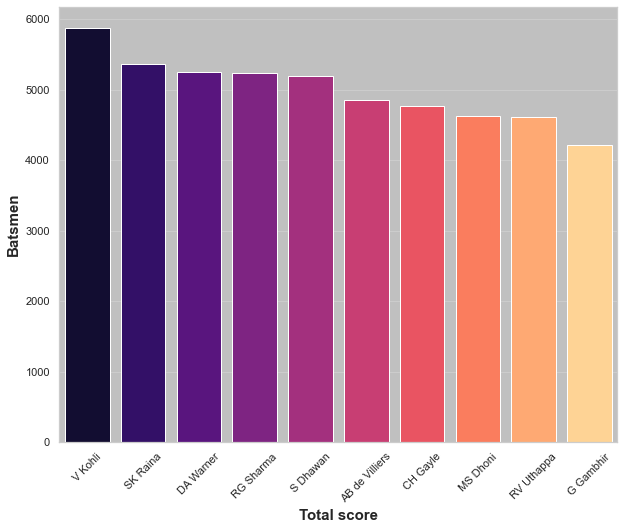

In [192]:
top_batsmen = top_bats(df1,df2,'Overall')
ax = plt.axes()
ax.set(facecolor='silver')
sns.barplot(x = top_batsmen.index, y = top_batsmen.values, palette='magma', saturation=1)
plt.ylabel('Batsmen', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total score', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45)
    

In [220]:
temp_df = season_data[(season_data.dismissal_kind == 'caught') | (season_data.dismissal_kind == 'bowled') | (season_data.dismissal_kind == 'lbw') | (season_data.dismissal_kind == 'stumped') | (season_data.dismissal_kind == 'hit wicket') | (season_data.dismissal_kind.isnull() == True)]
temp_df.dismissal_kind.unique()
temp_df.groupby("bowler")['is_wicket'].sum().sort_values(ascending = False)

bowler
SL Malinga         164
A Mishra           157
PP Chawla          150
DJ Bravo           142
Harbhajan Singh    139
                  ... 
S Midhun             0
MB Parmar            0
Abdur Razzak         0
MG Neser             0
LS Livingstone       0
Name: is_wicket, Length: 420, dtype: int64

In [225]:
def top_bowls(df1,df2,year):
    season_data = df1[['id','season']].merge(df2, left_on='id', right_on='id', how = 'left').drop(columns='id',axis = 1)
    temp_df = season_data[(season_data.dismissal_kind == 'caught') | (season_data.dismissal_kind == 'bowled') | (season_data.dismissal_kind == 'lbw') | (season_data.dismissal_kind == 'stumped') | (season_data.dismissal_kind == 'hit wicket') | (season_data.dismissal_kind.isnull() == True)]
    if year == 'Overall':
        temp_df = temp_df.groupby("bowler")['is_wicket'].sum().sort_values(ascending = False).head(10)
    elif year != 'Overall':
        temp_df = temp_df[temp_df.season == year].groupby("bowler")['is_wicket'].sum().sort_values(ascending = False).head(10)
        
    fig = px.bar(x = temp_df.index, y = temp_df.values,labels=dict(x = 'Top 10 Bowler', y = 'Wickets taken'))
    return fig

In [226]:
top_bowls(df1,df2,'Overall')

In [239]:
def win_percentage(df,year):
    if year == "Overall":
      matches_per_team = (df.team2.value_counts() + df.team1.value_counts()).sort_values(ascending=False)
      team_wins = df.winner.value_counts()
    elif year != 'Overall':
        matches_per_team = (df[df.season == year].team2.value_counts() + df[df.season == year].team1.value_counts()).sort_values(ascending=True)
        
    matches_per_team = matches_per_team.sort_index()
    team_wins = team_wins.sort_index()
    winning_percentage = team_wins / matches_per_team * 100
    winning_percentage = winning_percentage.sort_values(ascending=True)
    fig = px.bar(x = winning_percentage.values, y = winning_percentage.index, labels=dict(x = "Match Winning %",y = "Teams"))
    return fig

In [240]:
win_percentage(df1,'Overall')

In [368]:
high_scores =season_data.groupby(['id','batting_team','season'])['total_runs'].sum().reset_index().sort_values(by = 'total_runs',ascending = False).head(10)[['batting_team','total_runs','season']].sort_values(by = 'total_runs',ascending=True)
high_scores

,batting_team,total_runs,season
398,Delhi Daredevils,231,2011
852,Kings XI Punjab,231,2014
1482,Kolkata Knight Riders,232,2019
472,Kings XI Punjab,232,2011
1003,Royal Challengers Bangalore,235,2015
2,Chennai Super Kings,240,2008
1357,Kolkata Knight Riders,245,2018
292,Chennai Super Kings,246,2010
1119,Royal Challengers Bangalore,248,2016
702,Royal Challengers Bangalore,263,2013


In [667]:
px.bar(x = high_scores.batting_team, y = high_scores.season,color = high_scores.total_runs, text_auto = True,labels = dict(x = "Teams",y = "High Scores"))

In [358]:
high_scores['season']=high_scores.season.astype(int)
high_scores['total_runs'] = high_scores.total_runs.astype(int)
high_scores.dtypes

batting_team    object
total_runs       int32
season           int32
dtype: object

In [370]:
from matplotlib.pyplot import colorbar


fig = px.imshow(high_scores.pivot_table(index = 'season', columns='batting_team',values='total_runs'),text_auto = True,labels = dict(color = 'Score'), width = 500)
fig.update_coloraxes(showscale=False)


In [381]:
def highest_innings_score(df1,df2):
    season_data = df1[['id','season']].merge(df2, left_on='id', right_on='id')
    high_scores =season_data.groupby(['id','batting_team','season'])['total_runs'].sum().reset_index().sort_values(by = 'total_runs',ascending = False).head(10)[['batting_team','total_runs','season']].sort_values(by = 'total_runs',ascending=True)
    fig = px.imshow(high_scores.pivot_table(index = 'season', columns='batting_team',values='total_runs'),text_auto = True,labels = dict(color = 'Score'), width = 500)
    fig.update_coloraxes(showscale=False)
    return fig

In [382]:
highest_innings_score(df1,df2)

In [421]:
finals = df1.drop_duplicates(subset = ['season'],keep = 'last')

In [427]:
finals = finals[['season','team1','team2','winner']]
finals

,season,team1,team2,winner
57,2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
114,2009,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers
174,2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
247,2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings
321,2012,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
397,2013,Chennai Super Kings,Mumbai Indians,Mumbai Indians
457,2014,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
516,2015,Mumbai Indians,Chennai Super Kings,Mumbai Indians
576,2016,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
635,2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians


In [438]:
finalists = finals.team1.append(finals.team2).value_counts().reset_index()
finalists.rename(columns={0:'finalist'},inplace=True) 

C:\conda_tmp\ipykernel_10232\2895667715.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [483]:
finalists.rename({'index':'teams'},inplace = True)

In [484]:
winners.rename({'index':'teams'},inplace = True)

In [454]:
winners = finals.winner.value_counts().reset_index()
winners


,index,winner
0,Mumbai Indians,5
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Rajasthan Royals,1
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1


In [481]:
runner_ups_winners = pd.concat([finalists,winners],axis=1,).fillna(0)


In [473]:
runner_ups_winners['index'].rename({'index':'teams'},inplace = True)


C:\conda_tmp\ipykernel_10232\4194161786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [482]:
runner_ups_winners

,index,finalist,index,winner
0,Chennai Super Kings,8,Mumbai Indians,5.0
1,Mumbai Indians,6,Chennai Super Kings,3.0
2,Royal Challengers Bangalore,3,Kolkata Knight Riders,2.0
3,Kolkata Knight Riders,2,Rajasthan Royals,1.0
4,Sunrisers Hyderabad,2,Deccan Chargers,1.0
5,Delhi Capitals,1,Sunrisers Hyderabad,1.0
6,Rajasthan Royals,1,0,0.0
7,Deccan Chargers,1,0,0.0
8,Kings XI Punjab,1,0,0.0
9,Rising Pune Supergiant,1,0,0.0


In [486]:
winners.set_index('index')

,winner
index,
Mumbai Indians,5
Chennai Super Kings,3
Kolkata Knight Riders,2
Rajasthan Royals,1
Deccan Chargers,1
Sunrisers Hyderabad,1


In [503]:
runnerups_winners = finalists.append(winners).rename({'index':'teams'},axis = 1)

C:\conda_tmp\ipykernel_10232\2397720630.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [504]:
runnerups_winners

,teams,finalist,winner
0,Chennai Super Kings,8.0,NaN
1,Mumbai Indians,6.0,NaN
2,Royal Challengers Bangalore,3.0,NaN
3,Kolkata Knight Riders,2.0,NaN
4,Sunrisers Hyderabad,2.0,NaN
5,Delhi Capitals,1.0,NaN
6,Rajasthan Royals,1.0,NaN
7,Deccan Chargers,1.0,NaN
8,Kings XI Punjab,1.0,NaN
9,Rising Pune Supergiant,1.0,NaN


In [507]:
match_per_season = df1.season.value_counts().reset_index().rename(columns={'index':'season','season':
                                                                           'matches'}).sort_values(by = 'season')


In [509]:
season_score = season_data.groupby('season')['total_runs'].sum().reset_index()

In [510]:
runs_per_season = pd.concat([match_per_season, season_score.iloc[:,1]], axis = 1)

In [516]:
season_summary = runs_per_season.merge(finals,on = 'season').rename({"team1":'finalist 1','team2':'finalist 2'},axis =1)

0     [Chennai Super Kings, Chennai Super Kings, Che...
1                                                    []
2     [Chennai Super Kings, Chennai Super Kings, Che...
3     [Chennai Super Kings, Chennai Super Kings, Che...
4        [Kolkata Knight Riders, Kolkata Knight Riders]
5     [Chennai Super Kings, Chennai Super Kings, Che...
6        [Kolkata Knight Riders, Kolkata Knight Riders]
7     [Mumbai Indians, Mumbai Indians, Mumbai Indian...
8                                                    []
9     [Mumbai Indians, Mumbai Indians, Mumbai Indian...
10    [Chennai Super Kings, Chennai Super Kings, Che...
11    [Mumbai Indians, Mumbai Indians, Mumbai Indian...
12                                                   []
Name: finalist 1, dtype: object

In [558]:
season_summary['finalist 2'] if (season_summary['finalist 1'] == season_summary['winner']).all() else season_summary['finalist 1']

0             Chennai Super Kings
1     Royal Challengers Bangalore
2             Chennai Super Kings
3             Chennai Super Kings
4           Kolkata Knight Riders
5             Chennai Super Kings
6           Kolkata Knight Riders
7                  Mumbai Indians
8     Royal Challengers Bangalore
9                  Mumbai Indians
10            Chennai Super Kings
11                 Mumbai Indians
12                 Delhi Capitals
Name: finalist 1, dtype: object

In [561]:
def runner_up(df):
    a = df['finalist 1']
    b = df['finalist 2']
    c = df['winner']
    if (a != c).all():
        return a
    else: 
        return b

In [562]:
runner_up(season_summary)

0                Rajasthan Royals
1                 Deccan Chargers
2                  Mumbai Indians
3     Royal Challengers Bangalore
4             Chennai Super Kings
5                  Mumbai Indians
6                 Kings XI Punjab
7             Chennai Super Kings
8             Sunrisers Hyderabad
9          Rising Pune Supergiant
10            Sunrisers Hyderabad
11            Chennai Super Kings
12                 Mumbai Indians
Name: finalist 2, dtype: object

In [563]:
match_per_season = df1.season.value_counts().reset_index().rename(columns={'index':'season','season':
                                                                           'matches'}).sort_values(by = 'season')
season_score = season_data.groupby('season')['total_runs'].sum().reset_index()

runs_per_season = pd.concat([match_per_season, season_score.iloc[:,1]], axis = 1)

season_summary = runs_per_season.merge(finals,on = 'season').rename({"team1":'finalist 1','team2':'finalist 2'},axis =1)


In [564]:
season_summary

,season,matches,total_runs,finalist 1,finalist 2,winner
0,2008,58,19400,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
1,2009,57,19352,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers
2,2010,60,21154,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
3,2011,73,18864,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings
4,2012,74,16320,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
5,2013,76,17937,Chennai Super Kings,Mumbai Indians,Mumbai Indians
6,2014,60,22453,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
7,2015,59,18769,Mumbai Indians,Chennai Super Kings,Mumbai Indians
8,2016,60,22541,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
9,2017,59,19901,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians


In [573]:
temp_df= season_data.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()

In [589]:
temp_df.sort_values(by = 'season',ascending = True).sort_values(by  = "batsman_runs",ascending=False)

,batsman,season,batsman_runs
1825,V Kohli,2016,973
401,DA Warner,2016,848
852,KS Williamson,2018,735
1002,MEK Hussey,2013,733
334,CH Gayle,2012,733
...,...,...,...
1506,S Kaul,2019,0
1070,MM Sharma,2019,0
1061,MM Patel,2011,0
1509,S Lamichhane,2019,0


In [619]:
temp_df = temp_df.groupby(['season','batsman'])['batsman_runs'].max().sort_values(ascending=False).reset_index().drop_duplicates(subset = 'season', keep = 'first')

In [622]:
season_summary = season_summary.merge(temp_df,on = 'season').rename({'batsman':'player of the season'},axis = 1)

In [624]:
season_summary = season_summary.drop(columns = ['batsman_runs'],axis =1)

In [647]:
a = (season_summary['finalist 1'] == season_summary.winner).any()
if a == True:
    season_summary['runner_up'] = season_summary['finalist 2']
b = (season_summary['finalist 2'] == season_summary.winner).all()
if b == True:
    season_summary['runner_up'] = season_summary['finalist 1']
    

In [660]:
def runner_ups(season_summary,col1,col2,col3):
    list1 = []
    for a,b,c in zip(season_summary[col1],season_summary[col2], season_summary[col3]):
        if a == b:
            list1.append(c)
        else:
            list1.append(a)
    return list1    
        

In [665]:
season_summary['runner_up'] = runner_ups(season_summary,'finalist 1','winner','finalist 2')

In [666]:
season_summary

,season,matches,total_runs,finalist 1,finalist 2,winner,player of the season,runner_up
0,2008,58,19400,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,SE Marsh,Chennai Super Kings
1,2009,57,19352,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,ML Hayden,Royal Challengers Bangalore
2,2010,60,21154,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,SR Tendulkar,Mumbai Indians
3,2011,73,18864,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,Royal Challengers Bangalore
4,2012,74,16320,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,CH Gayle,Chennai Super Kings
5,2013,76,17937,Chennai Super Kings,Mumbai Indians,Mumbai Indians,MEK Hussey,Chennai Super Kings
6,2014,60,22453,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,RV Uthappa,Kings XI Punjab
7,2015,59,18769,Mumbai Indians,Chennai Super Kings,Mumbai Indians,DA Warner,Chennai Super Kings
8,2016,60,22541,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,V Kohli,Royal Challengers Bangalore
9,2017,59,19901,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,DA Warner,Rising Pune Supergiant


In [670]:
df1.player_of_match.value_counts().head(10)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

In [672]:
import plotly.graph_objects as go

In [698]:
def most_player_of_matches(df, year):
    if year == 'Overall':
        temp_df = df.player_of_match.value_counts().head(5)
    if year != 'Overall':
        temp_df = df[df.season == year].player_of_match.value_counts().head(5)
        
    fig = go.Figure(data = go.Pie(labels = temp_df.index, values = temp_df.values,pull=[0, 0, 0,0, 0] ))
    fig.update_traces(hoverinfo='percent', textinfo='value+label', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
, line=dict(color='#000000', width=2
            )))
    
    return fig
        
    
most_player_of_matches(df1,2020)

In [671]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen'],
                             values=[4500,2500,1053,500])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [699]:
df1.player_of_match.value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [742]:
temp_df

,season,batsman,batsman_runs
0,2016,V Kohli,973
2,2018,KS Williamson,735
3,2012,CH Gayle,733
4,2013,MEK Hussey,733
6,2019,DA Warner,692
9,2020,KL Rahul,670
10,2014,RV Uthappa,660
12,2017,DA Warner,641
15,2010,SR Tendulkar,618
16,2008,SE Marsh,616


In [795]:
def player_of_seasons(df,year):
  if year == 'Overall':
    temp_df = df
  elif year != 'Overall':
    temp_df = df[df.season == year]
  temp_df= temp_df.groupby(['batsman','season','batting_team'])['batsman_runs'].sum().reset_index()
  temp_df = temp_df.groupby(['season','batsman','batting_team'])['batsman_runs'].max().sort_values(ascending=False).reset_index().drop_duplicates(subset = 'season', keep = 'first')
  temp_df['season'] = temp_df.season.astype(str)
  fig =px.bar(data_frame=temp_df, x = 'batsman', y = 'batsman_runs',color = 'batting_team',text_auto=True)
  colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','violet', 'wheat']
  return fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))


In [797]:
player_of_seasons(season_data,2020)

In [745]:
temp_df= season_data.groupby(['batsman','season','batting_team'])['batsman_runs'].sum().reset_index()
temp_df = temp_df.groupby(['season','batsman','batting_team'])['batsman_runs'].max().sort_values(ascending=False).reset_index().drop_duplicates(subset = 'season', keep = 'first')
temp_df['season'] = temp_df.season.astype(str)
temp_df

,season,batsman,batting_team,batsman_runs
0,2016,V Kohli,Royal Challengers Bangalore,973
2,2018,KS Williamson,Sunrisers Hyderabad,735
3,2012,CH Gayle,Royal Challengers Bangalore,733
4,2013,MEK Hussey,Chennai Super Kings,733
6,2019,DA Warner,Sunrisers Hyderabad,692
9,2020,KL Rahul,Kings XI Punjab,670
10,2014,RV Uthappa,Kolkata Knight Riders,660
12,2017,DA Warner,Sunrisers Hyderabad,641
15,2010,SR Tendulkar,Mumbai Indians,618
16,2008,SE Marsh,Kings XI Punjab,616


In [1224]:
batsmans_df = df2[['id','over','ball','batsman','non_striker','batsman_runs','non_boundary','batting_team','extras_type','dismissal_kind']]
bowling_df = df2[['id','over','ball','bowler','total_runs','is_wicket','bowling_team','extras_type','dismissal_kind']]

KeyError: "['season'] not in index"

In [854]:
batsmans_df

,id,over,ball,batsman,non_striker,batsman_runs,non_boundary,batting_team
0,335982,6,5,RT Ponting,BB McCullum,1,0,Kolkata Knight Riders
1,335982,6,6,BB McCullum,RT Ponting,1,0,Kolkata Knight Riders
2,335982,7,1,BB McCullum,RT Ponting,0,0,Kolkata Knight Riders
3,335982,7,2,BB McCullum,RT Ponting,1,0,Kolkata Knight Riders
4,335982,7,3,RT Ponting,BB McCullum,1,0,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...
193463,1237181,12,5,RR Pant,SS Iyer,0,0,Delhi Capitals
193464,1237181,12,6,RR Pant,SS Iyer,1,0,Delhi Capitals
193465,1237181,13,1,RR Pant,SS Iyer,0,0,Delhi Capitals
193466,1237181,13,2,RR Pant,SS Iyer,1,0,Delhi Capitals


In [807]:
def total_runs(df, batsman):
    temp_df = df[df.batsman == batsman].batsman_runs.sum()
    return temp_df

In [809]:
total_runs(batsmans_df,'V Kohli')

5878

In [852]:
def fours(df, batsman):
    temp_df = df[(df.batsman == batsman) & (df.batsman_runs == 6)].shape[0]
    return temp_df
fours(batsmans_df,'SK Raina')

194

In [850]:
def sixes(df, batsman):
    temp_df = df[(df.batsman == batsman) & (df.batsman_runs == 4)].shape[0]
    return temp_df
sixes(batsmans_df,'SK Raina')

493

In [ ]:
def matches_played(df,batsman):
    df.

In [877]:
batsmans_df.groupby('batsman')['id'].nunique().sort_values(ascending = False)

batsman
RG Sharma            194
SK Raina             189
V Kohli              184
MS Dhoni             182
RV Uthappa           182
                    ... 
MA Wood                1
B Stanlake             1
Mashrafe Mortaza       1
Mohammad Ashraful      1
C Madan                1
Name: id, Length: 537, dtype: int64

In [879]:
temp_df = batsmans_df[['batsman','non_striker','id']].append(bowling_df[['bowler','id']])
temp_df['batsman'] = temp_df.batsman.fillna(temp_df.bowler)
temp_df.groupby('batsman')['id'].nunique().sort_values(ascending=False)

C:\conda_tmp\ipykernel_10232\2745352413.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



batsman
RG Sharma       194
SK Raina        189
V Kohli         185
MS Dhoni        182
RV Uthappa      182
               ... 
P Ray Barman      1
Tejas Baroka      1
U Kaul            1
UA Birla          1
AR Bawne          1
Name: id, Length: 580, dtype: int64

In [839]:
df2[(df2.batsman == "V Kohli") & (df2.batsman_runs == 6)].shape[0]

202

In [889]:
batsmans_df.groupby(['batsman','bowler'])['id'].nunique().reset_index().sort_values(by = 'id', ascending = False).groupby('batsman')['id'].sum().sort_values()

batsman
Shoaib Akhtar      1
Sunny Gupta        1
Rasikh Salam       1
JL Denly           1
Avesh Khan         1
                ... 
MS Dhoni         182
RV Uthappa       182
V Kohli          184
SK Raina         189
RG Sharma        194
Name: id, Length: 537, dtype: int64

In [937]:
temp_df.groupby(['batsman'])['id'].nunique().reset_index()

,batsman,id
0,A Ashish Reddy,28
1,A Chandila,12
2,A Chopra,6
3,A Choudhary,5
4,A Dananjaya,1
...,...,...
575,YV Takawale,10
576,Yashpal Singh,4
577,Younis Khan,1
578,Yuvraj Singh,129


In [944]:
(batsmans_df.groupby(['batsman'])['batsman_runs'].sum() / batsmans_df.groupby('batsman')['id'].nunique()).sort_values(ascending=False)

batsman
JM Bairstow       37.619048
LMP Simmons       37.206897
DA Warner         37.000000
KL Rahul          36.763889
CH Gayle          36.427481
                    ...    
C Nanda            0.000000
Abdur Razzak       0.000000
V Pratap Singh     0.000000
Arshdeep Singh     0.000000
JL Denly           0.000000
Length: 537, dtype: float64

In [947]:
batsmans_df.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
                  ... 
IC Pandey            0
S Kaushik            0
ND Doshi             0
V Pratap Singh       0
Abdur Razzak         0
Name: batsman_runs, Length: 537, dtype: int64

In [948]:
batsmans_df[batsmans_df.batsman == 'KL Rahul'].id.nunique()

72

In [952]:
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [956]:
df2.groupby('batsman')['inning'].

batsman       inning
DE Bollinger  2            1
BAW Mendis    1            1
RV Gomez      2            1
KP Appanna    1            1
JL Denly      1            1
                        ... 
V Kohli       2         2129
RG Sharma     1         2270
SK Raina      1         2336
V Kohli       1         2480
S Dhawan      1         2490
Name: inning, Length: 962, dtype: int64

In [979]:
runs_per_match = df2.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
total_runs = runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
total_runs.columns = total_runs.columns.droplevel()

In [980]:
runs_per_match

batsman_runs
batsman        id                   
A Ashish Reddy 548346             10
               548352              3
               548359              8
               548373             10
               548376              4
...                              ...
Z Khan         980903              4
               980993              2
               1082595             1
               1082635             2
               1082646             1

[12162 rows x 1 columns]

In [983]:
total_runs.sort_values(by = 'match count',ascending=False)

,match count,batsman run,average score
batsman,,,
RG Sharma,194,5230,26.958763
SK Raina,189,5368,28.402116
V Kohli,184,5878,31.945652
MS Dhoni,182,4632,25.450549
RV Uthappa,182,4607,25.313187
...,...,...,...
MA Wood,1,1,1.000000
B Stanlake,1,5,5.000000
Mashrafe Mortaza,1,2,2.000000


In [964]:
temp_df = df2.groupby(['batsman','id'])['batsman_runs'].sum().reset_index()
temp_df.groupby('batsman')['id'].nunique().sort_values(ascending=False)

batsman
RG Sharma            194
SK Raina             189
V Kohli              184
MS Dhoni             182
RV Uthappa           182
                    ... 
MA Wood                1
B Stanlake             1
Mashrafe Mortaza       1
Mohammad Ashraful      1
C Madan                1
Name: id, Length: 537, dtype: int64

In [1013]:
batsmans_df

,id,over,ball,batsman,non_striker,batsman_runs,non_boundary,batting_team,season
0,335982,6,5,RT Ponting,BB McCullum,1,0,Kolkata Knight Riders,2008
1,335982,6,6,BB McCullum,RT Ponting,1,0,Kolkata Knight Riders,2008
2,335982,7,1,BB McCullum,RT Ponting,0,0,Kolkata Knight Riders,2008
3,335982,7,2,BB McCullum,RT Ponting,1,0,Kolkata Knight Riders,2008
4,335982,7,3,RT Ponting,BB McCullum,1,0,Kolkata Knight Riders,2008
...,...,...,...,...,...,...,...,...,...
193463,1237181,12,5,RR Pant,SS Iyer,0,0,Delhi Capitals,2020
193464,1237181,12,6,RR Pant,SS Iyer,1,0,Delhi Capitals,2020
193465,1237181,13,1,RR Pant,SS Iyer,0,0,Delhi Capitals,2020
193466,1237181,13,2,RR Pant,SS Iyer,1,0,Delhi Capitals,2020


In [989]:
def matches_of_player(df,player):
    temp_df = df[df.batsman == player].id.nunique()
    return temp_df
matches_of_player(batsmans_df,'V Kohli')
    

184

In [988]:
def average_of_player(df,player):
    matches = df[df.batsman == player].id.nunique()
    score = df[df.batsman == player].batsman_runs.sum()
    temp_df = score / matches
    return temp_df

In [998]:
def high_score(df,player):
    return batsmans_df[batsmans_df.batsman == 'RR Pant'].groupby('id')['batsman_runs'].sum().max()

batsman
CH Gayle          175
BB McCullum       158
AB de Villiers    133
KL Rahul          132
RR Pant           128
                 ... 
C Nanda             0
SS Cottrell         0
Arshdeep Singh      0
Abdur Razzak        0
S Ladda             0
Name: batsman_runs, Length: 537, dtype: int64

In [1002]:
batsmans_df[batsmans_df.batsman == 'RR Pant'].groupby('id')['batsman_runs'].sum().max()

128

In [1026]:
def strike_rate(df,player):
  return (batsmans_df[(batsmans_df.batsman == player)].batsman_runs.sum() / batsmans_df[(batsmans_df.batsman == player)].ball.count()) * 100

In [1019]:
batsmans_df[(batsmans_df.batsman == 'V Kohli') & (batsmans_df.season == 2018)].id.nunique()

14

In [1029]:
batsmans_df.batsman_runs.value_counts()

0    77637
1    71937
4    21908
2    12408
6     8902
3      616
5       60
Name: batsman_runs, dtype: int64

In [1214]:
from pdb import run


def runs_classification(df,batsman):
  temp_df=  df[df.batsman == batsman].batsman_runs.value_counts().sort_index()
  fig = go.Figure(data = go.Pie(labels = temp_df.index, values = temp_df.values))
  fig.update_traces(hoverinfo='percent+label', textinfo='value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
                , line=dict(color='#000000', width=2)))
  fig.update_layout(
  title="Score",
  legend_title="Category",
  )
    
  return fig
runs_classification(batsmans_df,'V Kohli')

In [1063]:
temp_df = batsmans_df[batsmans_df.batsman == 'V Kohli'].groupby('over')['batsman_runs'].sum()

In [1075]:
batsmans_df[batsmans_df.batsman == 'V Kohli'].groupby('over')['batsman_runs'].size()

over
0     184
1     243
2     273
3     279
4     275
5     288
6     283
7     306
8     271
9     266
10    297
11    273
12    255
13    217
14    206
15    202
16    172
17    143
18    100
19     76
Name: batsman_runs, dtype: int64

In [1208]:
def dismissals(df,batsman):
  temp_df = df[df.batsman == batsman].dismissal_kind.value_counts()
  fig = go.Figure(data = go.Pie(labels=temp_df.index, values=temp_df.values))
  fig.update_traces(hoverinfo='percent+label', textinfo='value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
                , line=dict(color='#000000', width=2)), name = 'Wickets')

  fig.update_layout(
    title="Dismissals",
    legend_title="Types",
    
  )
  return fig

dismissals(batsmans_df,'V Kohli')

bowling analysis

In [1076]:
bowling_df

,id,over,ball,bowler,total_runs,is_wicket,bowling_team
0,335982,6,5,AA Noffke,1,0,Royal Challengers Bangalore
1,335982,6,6,AA Noffke,1,0,Royal Challengers Bangalore
2,335982,7,1,Z Khan,0,0,Royal Challengers Bangalore
3,335982,7,2,Z Khan,1,0,Royal Challengers Bangalore
4,335982,7,3,Z Khan,1,0,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
193463,1237181,12,5,NM Coulter-Nile,0,0,Mumbai Indians
193464,1237181,12,6,NM Coulter-Nile,1,0,Mumbai Indians
193465,1237181,13,1,KH Pandya,1,0,Mumbai Indians
193466,1237181,13,2,KH Pandya,1,0,Mumbai Indians


In [1079]:
def bowler_matches(df,bowler):
    return df[df.bowler == bowler].id.nunique() 
bowler_matches(bowling_df,'JJ Bumrah')

92

In [1092]:
bowling_df[bowling_df.bowler == 'DW Steyn'].groupby(['id','over']).size().reset_index().over.count()

364

In [1132]:
temp_df = df2[(df2.extras_type != 'wides') & (df2.extras_type != 'noballs') & (df2.extras_type != 'penalty')]
temp_df[temp_df.bowler == 'DW Steyn'].ball.count() / 6

362.6666666666667

In [1116]:
df2[(df2.bowler == 'DW Steyn') & (df2.extras_type.isnull() == True) & (df2.extras_type != 'wides') & (df2.extras_type != 'noballs') & (df2.extras_type != 'penalty')].ball.count() / 6

355.1666666666667

In [1110]:
df2.extras_type.unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [1133]:
def overs_delivered(df,bowler):
    temp_df = df[(df.extras_type != 'wides') & (df.extras_type != 'noballs') & (df.extras_type != 'penalty')]
    return (temp_df[temp_df.bowler == bowler].ball.count()) / 6

In [1171]:
temp_df = bowling_df[(bowling_df.dismissal_kind != 'run out') & (bowling_df.dismissal_kind != 'retired hurt') & (bowling_df.dismissal_kind != 'caught and bowled') | (bowling_df.dismissal_kind != 'obstructing the field') | (bowling_df.is_wicket.isnull() == False)]
temp_df[temp_df.bowler == 'SL Malinga'].dismissal_kind.value_counts()

caught               90
bowled               63
run out              18
lbw                  11
caught and bowled     6
Name: dismissal_kind, dtype: int64

In [1212]:
def wickets(df,batsman):
  temp_df = df[(df.dismissal_kind == 'caught') | (df.dismissal_kind == 'bowled') | (df.dismissal_kind == 'lbw') | (df.dismissal_kind == 'stumped') | (df.dismissal_kind == 'hit wicket') | (df.dismissal_kind.isnull() == True)]
  return temp_df[temp_df.bowler == batsman].is_wicket.sum()

wickets(bowling_df,'DJ Bravo')

142

In [1215]:
bowling_df

,id,over,ball,bowler,total_runs,is_wicket,bowling_team,extras_type,dismissal_kind
0,335982,6,5,AA Noffke,1,0,Royal Challengers Bangalore,NaN,NaN
1,335982,6,6,AA Noffke,1,0,Royal Challengers Bangalore,NaN,NaN
2,335982,7,1,Z Khan,0,0,Royal Challengers Bangalore,NaN,NaN
3,335982,7,2,Z Khan,1,0,Royal Challengers Bangalore,NaN,NaN
4,335982,7,3,Z Khan,1,0,Royal Challengers Bangalore,NaN,NaN
...,...,...,...,...,...,...,...,...,...
193463,1237181,12,5,NM Coulter-Nile,0,0,Mumbai Indians,NaN,NaN
193464,1237181,12,6,NM Coulter-Nile,1,0,Mumbai Indians,NaN,NaN
193465,1237181,13,1,KH Pandya,1,0,Mumbai Indians,wides,NaN
193466,1237181,13,2,KH Pandya,1,0,Mumbai Indians,NaN,NaN


In [1278]:
def average_of_bowler(df,bowler):
  return round(df[(df.bowler == bowler)  & (df.extras_type != 'byes') & (df.extras_type != 'legbyes')].total_runs.sum() / df[(df.bowler == bowler) | (df.batsman == bowler)].id.nunique(),1)
average_of_bowler(season_data,'DJ Bravo')

27.3

In [1256]:
season_data[(season_data.bowler == 'DJ Bravo')  | (season_data.batsman == 'DJ Bravo') & (season_data.extras_type != 'byes') & (season_data.extras_type != 'legbyes')].groupby('season')['id'].nunique()

season
2008     9
2009    11
2010    10
2011     6
2012    18
2013    18
2014     1
2015    17
2016    15
2018    16
2019    12
2020     6
Name: id, dtype: int64

In [1293]:
def economy(df,bowler):
  return (df[(bowling_df.bowler == bowler) & (df.extras_type != 'byes') & (df.extras_type != 'legbyes')].total_runs.sum() / df[(df.bowler == 'DJ Bravo') & (df.extras_type != 'wides') & (df.extras_type != 'noballs') & (df.extras_type != 'penalty')].ball.count()) * 6

In [1287]:
bowling_df[(bowling_df.bowler == 'DJ Bravo')].ball.count()

2846

In [1346]:
def func(df):
    list1 = []
    for a,b in zip(df.id,df.is_wicket):
        if b == 4:
            list1.append(a)
            return list1

In [1350]:
temp_df = bowling_df[bowling_df.bowler == 'DJ Bravo'].groupby('id')['is_wicket','total_runs'].sum().reset_index()
a = func(temp_df)
a


C:\conda_tmp\ipykernel_10232\211481741.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[598073]

In [1356]:
temp_df[temp_df.is_wicket == 4].total_runs.min()

22

In [1367]:
def best_figures(df,player):
  temp_df = df[df.bowler == player].groupby('id')['is_wicket','total_runs'].sum()
  n = temp_df.is_wicket.max()
  runs = temp_df[temp_df.is_wicket == n].total_runs.min()
  return (f"{runs}-{n}")
best_figures(bowling_df,'Shoaib Akhtar')

C:\conda_tmp\ipykernel_10232\2654244318.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



'11-4'

In [1307]:
bowling_df

,id,over,ball,bowler,total_runs,is_wicket,bowling_team,extras_type,dismissal_kind
0,335982,6,5,AA Noffke,1,0,Royal Challengers Bangalore,NaN,NaN
1,335982,6,6,AA Noffke,1,0,Royal Challengers Bangalore,NaN,NaN
2,335982,7,1,Z Khan,0,0,Royal Challengers Bangalore,NaN,NaN
3,335982,7,2,Z Khan,1,0,Royal Challengers Bangalore,NaN,NaN
4,335982,7,3,Z Khan,1,0,Royal Challengers Bangalore,NaN,NaN
...,...,...,...,...,...,...,...,...,...
193463,1237181,12,5,NM Coulter-Nile,0,0,Mumbai Indians,NaN,NaN
193464,1237181,12,6,NM Coulter-Nile,1,0,Mumbai Indians,NaN,NaN
193465,1237181,13,1,KH Pandya,1,0,Mumbai Indians,wides,NaN
193466,1237181,13,2,KH Pandya,1,0,Mumbai Indians,NaN,NaN


In [1396]:
runs = batsmans_df[batsmans_df.batsman == 'V Kohli'].groupby('over')['batsman_runs'].sum()
balls = batsmans_df[(batsmans_df.batsman == 'V Kohli') & (batsmans_df.extras_type != 'wides')].groupby('over').ball.count()


In [1397]:
str_rate = (runs / balls) * 100 
str_rate


over
0     107.262570
1     109.704641
2     119.318182
3     124.632353
4     110.740741
5     113.523132
6      96.715328
7     114.765101
8     125.939850
9     119.622642
10    121.501706
11    130.740741
12    130.278884
13    136.150235
14    151.243781
15    155.497382
16    180.838323
17    201.459854
18    230.526316
19    237.500000
dtype: float64

In [1413]:
def str_rate_through_over(df,player):
    runs = df[df.batsman == player].groupby('over')['batsman_runs'].sum()
    balls = df[(df.batsman == player) & (df.extras_type != 'wides')].groupby('over').ball.count()
    str_rate = round((runs / balls) * 100,2) 
    fig = px.bar(data_frame= str_rate, x= str_rate.index, y = str_rate.values, text_auto=True, labels= dict(y = 'Strike Rate'))
    return fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1 
    )
)
str_rate_through_over(batsmans_df,'V Kohli')

In [1492]:
temp_df['scores'] = temp_df['batsman_runs'].apply(lambda x: ('30+' if (50 > x >= 30) else('50+' if (100 > x >= 50) else ('100+' if (x >= 100) else 0))))

In [1499]:
temp_df = temp_df[temp_df.scores != 0].scores.value_counts()


AttributeError: 'Series' object has no attribute 'scores'

In [4]:
fig = go.Figure(data = go.Pie(labels = temp_df.index , values = temp_df.values))
fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

fig.update_layout(
    title="30s - 50s - 100s runs",
    font=dict(
    size = 13)
  )

NameError: name 'temp_df' is not defined

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df1 = pd.read_csv("IPL Matches 2008-2020.csv")
df2 = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
batsmans_df = df2[['id','over','ball','batsman','non_striker','batsman_runs','non_boundary','batting_team','extras_type','player_dismissed','dismissal_kind','bowler']]
bowling_df = df2[['id','over','ball','bowler','total_runs','is_wicket','bowling_team','extras_type','dismissal_kind','batsman']]


In [4]:
def scores(df,player):
    temp_df = df[df.batsman == player].groupby('id')['batsman_runs'].sum().reset_index()
    temp_df['scores'] = temp_df['batsman_runs'].apply(lambda x: ('30+' if (50 > x >= 30) else('50+' if (100 > x >= 50) else ('100+' if (x >= 100) else 0))))
    temp_df = temp_df[temp_df.scores != 0].scores.value_counts()
    fig = go.Figure(data = go.Pie(labels = temp_df.index , values = temp_df.values))
    fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

    fig.update_layout(
    title="30s - 50s - 100s runs",
    font=dict(
    size = 13)
    )
    return fig


In [5]:
scores(batsmans_df,'V Kohli')

In [6]:
temp_df = batsmans_df[batsmans_df.batsman == 'V Kohli'].groupby('id')['batsman_runs'].sum().reset_index()
temp_df['scores'] = temp_df['batsman_runs'].apply(lambda x: ('30+' if (50 > x >= 30) else('50+' if (100 > x >= 50) else ('100+' if (x >= 100) else 0))))
temp_df = temp_df.scores.value_counts()


In [7]:
fig = go.Figure(data = go.Pie(labels = temp_df.index , values = temp_df.values))
fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

fig.update_layout(
title="30s - 50s - 100s runs",
font=dict(
size = 13)
)

In [19]:
temp_df = bowling_df[(bowling_df.bowler == 'SL Malinga') & (bowling_df.dismissal_kind == 'caught') | (bowling_df.dismissal_kind == 'bowled') | (bowling_df.dismissal_kind == 'lbw') | (bowling_df.dismissal_kind == 'stumped') | (bowling_df.dismissal_kind == 'hit wicket') | (bowling_df.dismissal_kind.isnull() == True)].groupby('id').is_wicket.sum().reset_index()
temp_df = temp_df[(temp_df.is_wicket == 4) | (temp_df.is_wicket == 5) | (temp_df.is_wicket == 6)]
temp_df.is_wicket.value_counts()

4    145
5     83
6     56
Name: is_wicket, dtype: int64

In [8]:
def wickets_haul(df,player):
    temp_df = df[(df.dismissal_kind == 'caught') | (df.dismissal_kind == 'bowled') | (df.dismissal_kind == 'lbw') | (df.dismissal_kind == 'stumped') | (df.dismissal_kind == 'hit wicket') & (df.dismissal_kind.isnull() == False)]
    temp_df = temp_df[temp_df.bowler == player].groupby('id')['is_wicket'].sum().reset_index()
    temp_df = temp_df[(temp_df.is_wicket == 3) | (temp_df.is_wicket == 4) | (temp_df.is_wicket == 5) | (temp_df.is_wicket == 6)]
    temp_df = temp_df.is_wicket.value_counts()
    fig = go.Figure(data = go.Pie(labels = temp_df.index , values = temp_df.values))
    fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=15,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

    fig.update_layout(
    title="4 - 5 -6 wickets-haul",
    font=dict(
    size = 13)
    )
    return fig
wickets_haul(bowling_df,'DJ Bravo')

In [131]:
temp_df = bowling_df[(bowling_df.dismissal_kind == 'caught') | (bowling_df.dismissal_kind == 'bowled') | (bowling_df.dismissal_kind == 'lbw') | (bowling_df.dismissal_kind == 'stumped') | (bowling_df.dismissal_kind == 'hit wicket') & (bowling_df.dismissal_kind.isnull() == False)]
temp_df = temp_df[temp_df.bowler == 'TA Boult'].groupby('id')['is_wicket'].sum().reset_index()
temp_df = temp_df[(temp_df.is_wicket == 4) | (temp_df.is_wicket == 5) | (temp_df.is_wicket == 6)]

In [134]:
temp_df.is_wicket.value_counts()


4    1
Name: is_wicket, dtype: int64

In [42]:
temp_df = bowling_df[(bowling_df.dismissal_kind == 'caught') | (bowling_df.dismissal_kind == 'bowled') | (bowling_df.dismissal_kind == 'lbw') | (bowling_df.dismissal_kind == 'stumped') | (bowling_df.dismissal_kind == 'hit wicket') & (bowling_df.dismissal_kind.isnull() == False)]
temp_df = temp_df[temp_df.bowler == 'TA Boult'].groupby('id')['is_wicket'].sum().reset_index()

In [44]:
temp_df.is_wicket.sum()

63

In [47]:
df2

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [65]:
dismissals

13

In [71]:
score = batsmans_df[batsmans_df.batsman == 'MEK Hussey'].batsman_runs.sum()
dismissals = batsmans_df[(batsmans_df.batsman == 'MEK Hussey') & (batsmans_df.player_dismissed.isnull() == False)].player_dismissed.count()
score / (dismissals)

38.01923076923077

In [13]:
def wickets_haul(df,player):

  temp = df[(df.dismissal_kind == 'caught') | (bowling_df.dismissal_kind == 'bowled') | (bowling_df.dismissal_kind == 'lbw') | (bowling_df.dismissal_kind == 'stumped') | (bowling_df.dismissal_kind == 'hit wicket') & (bowling_df.dismissal_kind.isnull() == False)]
  temp = temp[temp.bowler == player].groupby('id')['is_wicket'].sum().reset_index()
  temp = temp[(temp.is_wicket == 3) | (temp.is_wicket == 4) | (temp.is_wicket == 5) | (temp.is_wicket == 6)]
  n = temp.is_wicket
  l = []
  for a in n:
     a = str(a) + 's'
     l.append(a) 
  temp['is_wicket'] = l
  temp = temp.value_counts().reset_index().rename({0:'times'},axis = 1)
  fig = go.Figure(data = go.Pie(labels = temp.is_wicket , values = temp.times))
  fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=15,
                  marker=dict(colors =  ['mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

  fig.update_layout(
    title="3 - 4 - 5 -6 wickets-haul",
    font=dict(
    size = 13)
    )
  return fig
wickets_haul(bowling_df,'MA Starc')

In [225]:
temp_df = batsmans_df[batsmans_df.batsman == 'V Kohli'].groupby('id')['batsman_runs'].sum().reset_index()
temp_df['scores'] = temp_df['batsman_runs'].apply(lambda x: ('30+' if (50 > x >= 30) else('50+' if (100 > x >= 50) else ('100+' if (x >= 100) else 0))))
temp_df = temp_df[(temp_df.scores == '30+') | (temp_df.scores == '50+') | (temp_df.scores == '100+')]
temp_df = temp_df.scores.value_counts()
fig = go.Figure(data = go.Pie(labels = temp_df.index , values = temp_df.values))
fig.update_traces(hoverinfo='percent', textinfo='label+value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange']
                , line=dict(color='#000000', width=2)))

fig.update_layout(
    title="30s - 50s - 100s runs",
    font=dict(
    size = 13)
    )

Team wise analysis

In [22]:
df1

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [26]:
def clean_data(df):
    
    df.team1.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
    df.team2.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
    df.toss_winner.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
    df.winner.replace("Rising Pune Supergiants", "Rising Pune Supergiant",inplace = True)
    df['date'] = pd.to_datetime(df.date,infer_datetime_format=True)
    df['season'] = df.date.dt.year
    
    return df

In [38]:
df1 = clean_data(df1)
df1


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [39]:
season_data = df1[['id','season']].merge(df2,on = 'id')

In [40]:
season_winners = df1.drop_duplicates(subset = {'season'},keep = 'last')
season_winners[season_winners.winner == 'Mumbai Indians'].shape[0]

5

In [41]:
def season_wins(df,team):
    temp_df = df.drop_duplicates(subset = {'season'},keep = 'last')
    return f"{temp_df[temp_df.winner == team].shape[0]} times"
season_wins(df1,'Mumbai Indians')

'5 times'

In [42]:
def runner_up_times(df,team):
    list1 = []
    temp = df.drop_duplicates(subset = {"season"},keep = 'last')
    for a,b,c in zip(temp['team1'],temp['team2'],temp['winner']):
        if a == c:
            list1.append(b)
        else:
            list1.append(a)
    temp['runner_ups'] = list1
    temp = temp[temp.runner_ups == team].shape[0]
    return f"{temp} times"
runner_up_times(df1,'Royal Challengers Bangalore')

C:\conda_tmp\ipykernel_11272\3889265344.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'3 times'

In [43]:
def highest_totals_defending(df,team,inning):
    temp = df[(df.batting_team == team) & (df.inning == 1)]
    temp = temp.groupby(['id','season','bowling_team']).total_runs.sum().reset_index().sort_values(by = 'total_runs' ,ascending = False).head(10)
    fig = px.bar(x = temp['season'], y = temp['total_runs'],height=500,color = temp['bowling_team'],text_auto=True,title = 'Top 10 Highest Totals in 1st Innings', labels = dict(x = 'Season', y = 'Innings Total', color = 'Bowling Team'))
    fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [2010,2013,2015,2016,2017,2018,2020]
        
    ))
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
                      
highest_totals_defending(season_data,'Mumbai Indians',1)

In [44]:
def highest_totals_chasing(df,team,inning):
    temp = df[(df.batting_team == team) & (df.inning == 2)]
    temp = temp.groupby(['id','season','bowling_team']).total_runs.sum().sort_values(ascending = False).reset_index().head(10)
    fig = px.bar(x = temp['season'], y = temp['total_runs'],height=500,color = temp['bowling_team'],text_auto=True,title = 'Top 10 successfull chasing totals', labels = dict(x = 'Season', y = 'Innings Total', color = 'Bowling Team'))
    fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [2008,2014,2015,2016,2017,2019,2020]
        
    ))
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
highest_totals_chasing(season_data,'Mumbai Indians',2)

In [45]:
season_data = df1[['id','season']].merge(df2,on = 'id')

In [46]:
temp = season_data[(season_data.batting_team == 'Mumbai Indians')]
temp = temp.groupby(['id','season','inning']).total_runs.sum().sort_values(ascending = True).reset_index().head(10)
temp['inning'] = temp['inning'].astype('str')
px.bar(x = temp['season'], y = temp['total_runs'])

In [305]:
temp

,id,season,inning,total_runs
0,1082641,2017,2,223
1,419114,2010,1,218
2,1136574,2018,1,213
3,419107,2010,1,212
4,1082635,2017,1,212
...,...,...,...,...
198,980973,2016,2,92
199,598019,2013,2,92
200,501251,2011,2,87
201,1136583,2018,2,87


In [374]:
temp_df = df1.team1.append(df1.team2).reset_index()
temp_df.drop(['index'] , axis = 1, inplace = True
             )
temp_df.rename(columns = {0:'team'},inplace = True)

matches_of_each_team = temp_df.team.value_counts()
matches_of_each_team.reset_index()

C:\conda_tmp\ipykernel_13628\1463043794.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,index,team
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [47]:
def toss_percentage(df,team,year):
    if year == 'Overall':
        matches_per_team = (df[df.team2 == team].groupby('season')['team2'].count() + df[df.team1 == team].groupby('season')['team2'].count()).sort_values(ascending=False)
        temp_df = round(((df[df.toss_winner == team].groupby('season').toss_winner.count() / matches_per_team) * 100),1)
        fig = px.bar(x = temp_df.index, y = temp_df.values, labels=dict(x = "Season",y = "Toss Winning percentage %"),text_auto=True)
    elif year != 'Overall':
        matches_per_team = (df[(df.season == year) & (df.team2 == team)].groupby('season')['team2'].count() + df[(df.season == year) & (df.team1 == team)].groupby('season')['team2'].count())
        temp_df = round(((df[(df.season == year) & (df.toss_winner == team)].toss_winner.count() / matches_per_team) * 100),2)
        fig = px.bar(x = temp_df.index, y = temp_df.values, labels=dict(x = "Season",y = "Toss Winning percentage %"),text_auto=True)
        fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [year]))
        
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
toss_percentage(df1,'Mumbai Indians','Overall')

In [178]:
def win_percentage_of_team(df,year,team):
    if year == "Overall":
      matches_per_team = (df[df.team2 == team].groupby('season').team2.count() + df[df.team1 == team].groupby('season').team1.count()).sort_values(ascending=False)
      team_wins = df[df.winner == team].groupby('season').winner.count()
      matches_per_team = matches_per_team.sort_index()
      team_wins = team_wins.sort_index()
      winning_percentage = team_wins / matches_per_team * 100
      winning_percentage = round(winning_percentage.sort_values(ascending=True),1)
      fig = px.bar(x = winning_percentage.index, y = winning_percentage.values, labels=dict(x = "Season",y = "Match Winning %"),text_auto=True)
    elif year != 'Overall':
      matches_per_team = (df[(df.season == year) & (df.team2 == team)].groupby('season').team2.count() + df[(df.season == year) & (df.team1 == team)].groupby('season').team1.count()).sort_values(ascending=True)
      team_wins = df[(df.season == year) * (df.winner == team)].groupby('season').winner.count()
      matches_per_team = matches_per_team.sort_index()
      team_wins = team_wins.sort_index()
      winning_percentage = team_wins / matches_per_team * 100
      winning_percentage = round(winning_percentage.sort_values(ascending=True),1)
      fig = px.bar(x = winning_percentage.index, y = winning_percentage.values, labels=dict(x = "Season",y = "Match Winning %"),text_auto=True)
      fig.update_layout(xaxis = dict(
      tickmode = 'array',
      tickvals = [year]))
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
win_percentage_of_team(df1,'Overall','Mumbai Indians')

In [110]:
player_of_seasons = ['Shane Watson','Adam Gilchrist','Sachin Tendulkar','Chris Gayle','Sunil Narine','Shane Watson',"Glenn Maxwell",'Andre Russell','Virat Kohli','Ben Stokes','Sunil Narine','Andre Russell','Jofra Archer']

In [70]:
seasons = np.arange(2008,2021)
seasons

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [77]:
temp_df = pd.DataFrame(player_of_seasons,seasons)
temp_df = temp_df.rename(columns={0:'player_of_season'})
temp_df.player_of_season.value_counts()

Shane Watson        2
Sunil Narine        2
Andre Russell       2
Adam Gilchrist      1
Sachin Tendulkar    1
Chris Gayle         1
Glenn Maxwell       1
Virat Kohli         1
Ben Stokes          1
Jofra Archer        1
Name: player_of_season, dtype: int64

In [116]:
temp_df = pd.DataFrame({'player_of_seasons':player_of_seasons,'season':seasons})

In [117]:
temp_df

,player_of_seasons,season
0,Shane Watson,2008
1,Adam Gilchrist,2009
2,Sachin Tendulkar,2010
3,Chris Gayle,2011
4,Sunil Narine,2012
5,Shane Watson,2013
6,Glenn Maxwell,2014
7,Andre Russell,2015
8,Virat Kohli,2016
9,Ben Stokes,2017


In [114]:
df1 =df1.merge(temp_df, on="season")

In [148]:
def player_of_seasons(year):
  player_of_season = ['Shane Watson','Adam Gilchrist','Sachin Tendulkar','Chris Gayle','Sunil Narine','Shane Watson',"Glenn Maxwell",'Andre Russell','Virat Kohli','Ben Stokes','Sunil Narine','Andre Russell','Jofra Archer']
  seasons = np.arange(2008,2021)
  temp_df = pd.DataFrame({'player_of_seasons':player_of_season,'seasons':seasons})
  
  if year == 'Overall':
    temp_df = temp_df
  elif year != 'Overall':
    temp_df = temp_df[temp_df.seasons == year]
  temp_df['seasons'] = temp_df.seasons.astype(str)
  fig =px.scatter(data_frame=temp_df, x = 'seasons', y = 'player_of_seasons')
  fig =px.line(data_frame=temp_df, x = 'seasons', y = 'player_of_seasons',markers=True)
  fig.update_traces()
  #colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','violet', 'wheat']
  return fig

In [149]:
player_of_seasons('Overall')

In [ ]:
def player_of_seasons(df,year):
    if year == 'Overall':
        temp_df = df
    elif year != 'Overall':
        temp_df = df[df.season == year]
    
    temp_df = temp_df.groupby('id')['batsman_runs'].sum

In [179]:
def top_batsmen(df,team,year):
    if year == 'Overall':
        temp_df = df[df.batting_team == team]
    elif year != "Overall":
        temp_df = df[(df.batting_team == team) & (df.season == year)]
    
    temp_df = temp_df.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending = False).head(5)
    fig = px.bar(x = temp_df.index , y = temp_df.values , text_auto=True, labels = dict(x = 'Batsman', y = 'Runs Scored'))
    fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
    return fig

top_batsmen(season_data,'Mumbai Indians','Overall')

In [180]:
def top_bowlers(df,team,year):
    if year == 'Overall':
        temp_df = df[df.bowling_team == team]
    elif year != "Overall":
        temp_df = df[(df.bowling_team == team) & (df.season == year)]
    
    temp_df = temp_df[(temp_df.dismissal_kind != 'run out')  & (temp_df.dismissal_kind != 'obstructing the field')].groupby(['bowler'])['is_wicket'].sum().sort_values(ascending = False).head(5)
    fig = px.bar(x = temp_df.index , y = temp_df.values , text_auto=True, labels = dict(x = 'Batsman', y = 'Runs Scored'))
    fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
    return fig
top_bowlers(season_data,'Mumbai Indians',2020)

In [183]:
def win_percentage_of_team(df,year,team):
    if year == "Overall":
      matches_per_team = (df[df.team2 == team].groupby('season').team2.count() + df[df.team1 == team].groupby('season').team1.count()).sort_values(ascending=False)
      team_wins = df[df.winner == team].groupby('season').winner.count()
      matches_per_team = matches_per_team.sort_index()
      team_wins = team_wins.sort_index()
      winning_percentage = team_wins / matches_per_team * 100
      winning_percentage = round(winning_percentage.sort_values(ascending=True),1)
      fig = px.bar(x = winning_percentage.index, y = winning_percentage.values, labels=dict(x = "Season",y = "Match Winning %"),text_auto=True)
    elif year != 'Overall':
        matches_per_team = (df[(df.season == year) & (df.team2 == team)].groupby('season').team2.count() + df[(df.season == year) & (df.team1 == team)].groupby('season').team1.count()).sort_values(ascending=True)
        team_wins = df[(df.season == year) * (df.winner == team)].groupby('season').winner.count()
        matches_per_team = matches_per_team.sort_index()
        team_wins = team_wins.sort_index()
        winning_percentage = team_wins / matches_per_team * 100
        winning_percentage = round(winning_percentage.sort_values(ascending=True),1)
        fig = px.bar(x = winning_percentage.index, y = winning_percentage.values, labels=dict(x = "Season",y = "Match Winning %"),text_auto=True)
        fig.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [year]))
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2)))
win_percentage_of_team(df1,'Overall','Royal Challengers Bangalore')

In [189]:
def highest_totals_defending(df,team,inning):
    temp = df[(df.batting_team == team) & (df.inning == inning)]
    temp = temp.groupby(['id','season','bowling_team']).total_runs.sum().reset_index().sort_values(by = 'total_runs' ,ascending = False).head(10)
    fig = px.bar(x = temp['season'], y = temp['total_runs'],height=500,color = temp['bowling_team'],text_auto=True,title = 'Top 10 Highest Totals in 1st Innings', labels = dict(x = 'Season', y = 'Innings Total', color = 'Bowling Team'))
    fig.update_layout(xaxis = dict(
        tickmode = 'linear'
        
    ))
    return fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2))
                  )
highest_totals_defending(season_data,'Chennai Super Kings',1)

In [196]:
temp_df = df1.team1.append(df1.team2).reset_index()
temp_df.drop(['index'] , axis = 1, inplace = True
             )
temp_df.rename(columns = {0:'team'},inplace = True)
matches_of_each_team = temp_df.team.value_counts()


C:\conda_tmp\ipykernel_11272\1047482941.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [193]:
df1[(df1.team1 == 'Royal Challengers Bangalore')].season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [199]:
def selected_year(df,year):
    temp_df = df[df.season == year].team1.append(df[df.season==year].team2).reset_index()
    temp_df.drop(['index'] , axis = 1, inplace = True
                )
    temp_df.rename(columns = {0:'team'},inplace = True)

    matches_of_team_for_specific_year = temp_df.team.value_counts()
    return matches_of_team_for_specific_year

In [315]:
def toss_winners(df,year):
    if year == 'Overall':
      temp_df = ((df.toss_winner.value_counts() / matches_of_each_team) * 100).sort_values(ascending = True)
    elif year != "Overall":
      temp_df = ((df[df.season == year].toss_winner.value_counts() / selected_year(df,year))*100).sort_values(ascending = True)
      
    fig = px.bar(x = temp_df.values, y = temp_df.index, labels=dict(x = "Toss winning %",y = "Team"))
      
    return fig
toss_winners(df1,2020)

C:\conda_tmp\ipykernel_11272\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [210]:
def win_percentage(df,year):
    if year == "Overall":
      matches_per_team = (df.team2.value_counts() + df.team1.value_counts()).sort_values(ascending=False)
      team_wins = df.winner.value_counts()
    elif year != 'Overall':
      matches_per_team = (df[df.season == year].team2.value_counts() + df[df.season == year].team1.value_counts()).sort_values(ascending=True)
      team_wins = df[df.season == year].winner.value_counts()
    matches_per_team = matches_per_team.sort_index()
    team_wins = team_wins.sort_index()
    winning_percentage = team_wins / selected_year(df1,year) * 100
    winning_percentage = winning_percentage.sort_values(ascending=True)
    fig = px.bar(x = winning_percentage.values, y = winning_percentage.index, labels=dict(x = "Match Winning %",y = "Teams"))
    return fig
win_percentage(df1,2019)


C:\conda_tmp\ipykernel_11272\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [230]:
temp_df = df1.team1.append(df1.team2).reset_index()
temp_df.drop(['index'] , axis = 1, inplace = True
             )
temp_df.rename(columns = {0:'team'},inplace = True)
matches_of_each_team = temp_df.team.value_counts()

matches_of_each_team

C:\conda_tmp\ipykernel_11272\2920069468.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
Name: team, dtype: int64

In [244]:
def win_percentage(df,year):
    if year == "Overall":
      matches_per_team = (df.team2.value_counts() + df.team1.value_counts()).sort_values(ascending=False)
      team_wins = df.winner.value_counts()
      matches_per_team = matches_per_team.sort_index()
      team_wins = team_wins.sort_index()
      winning_percentage = team_wins / matches_per_team * 100
      winning_percentage = winning_percentage.sort_values(ascending=True)
    elif year != 'Overall':
        matches_per_team = (df[df.season == year].team2.value_counts() + df[df.season == year].team1.value_counts()).sort_values(ascending=True)
        team_wins = df[df.season == year].winner.value_counts()
        matches_per_team = matches_per_team.sort_index()
        team_wins = team_wins.sort_index()
        winning_percentage = team_wins / selected_year(df1,year) * 100
        winning_percentage = winning_percentage.sort_values(ascending=True)
    fig = px.bar(x = winning_percentage.values, y = winning_percentage.index, labels=dict(x = "Match Winning %",y = "Teams"))
    return fig
win_percentage(df1,2020)

C:\conda_tmp\ipykernel_11272\3447979695.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [257]:
df1[df1.team1 == 'Royal Challengers Bangalore'].groupby(['season'])['team1'].count()

season
2008     7
2009    16
2010     9
2011     8
2012     7
2013     8
2014     7
2015     8
2016     8
2017     6
2018     7
2019     7
2020    10
Name: team1, dtype: int64

In [312]:
def team_matches(df,team):
    temp_df = pd.concat((df[df.team1 == team].groupby(['season'])['team1'].count(),df[df.team2 == team].groupby(['season'])['team2'].count()),axis =1)
    temp_df['seasons'] = temp_df.index
    temp_df = temp_df.reset_index()
    temp_df = temp_df.drop('season',axis = 1)
    temp_df['team2'] = temp_df.team2.fillna(0)
    temp_df['matches'] = temp_df['team1'] + temp_df['team2']
    temp_df['matches'] = temp_df['matches'].astype('int')
    return temp_df[['seasons','matches']]
team_matches(df1,'Chennai Super Kings')

,seasons,matches
0,2008,16
1,2009,14
2,2010,16
3,2011,16
4,2012,18
5,2013,18
6,2014,16
7,2015,17
8,2018,16
9,2019,17


In [313]:
def toss_percentage(df,team,year):
    global matches_of_each_team
    if year == 'Overall':
        matches_per_team = (df[df.team1 == team].groupby('season')['team1'].count() + df[df.team2 == team].groupby('season')['team2'].count()).sort_values(ascending=False).fillna(0)
        temp_df = ((df[df.toss_winner == team].groupby('season').toss_winner.count().reset_index() / team_matches(df1,team)) * 100)
        fig = px.bar(x = temp_df.index, y = temp_df.values, labels=dict(x = "Season",y = "Toss Winning percentage %"))
    elif year != 'Overall':
        matches_per_team = (df[(df.season == year) & (df.team2 == team)].groupby('season')['team2'].count() + df[(df.season == year) & (df.team1 == team)].groupby('season')['team2'].count())
        temp_df = ((df[(df.season == year) & (df.toss_winner == team)].toss_winner.count() / matches_per_team) * 100)
        fig = px.bar(x = temp_df.index, y = temp_df.values, labels=dict(x = "Season",y = "Toss Winning percentage %"))
    fig.update_traces(
    marker=dict(line=dict(color='#000000', width=2)))
    
    return matches_per_team
toss_percentage(df1,'Royal Challengers Bangalore','Overall')

ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 4, whereas the length of  previously-processed arguments ['x'] is 13

In [289]:
temp_df = df1[(df1.team1 == 'Chennai Super Kings') | (df1.team2 == 'Chennai Super Kings')]
temp_df[temp_df.season == 2018]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,player_of_seasons
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018,Sunil Narine
640,1136565,Chennai,2018-04-10,SW Billings,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,CB Gaffaney,AK Chaudhary,2018,Sunil Narine
647,1136572,Chandigarh,2018-04-15,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Kings XI Punjab,runs,4.0,N,NaN,VA Kulkarni,CK Nandan,2018,Sunil Narine
652,1136577,Pune,2018-04-20,SR Watson,Maharashtra Cricket Association Stadium,0,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,runs,64.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon,2018,Sunil Narine
655,1136580,Hyderabad,2018-04-22,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,field,Chennai Super Kings,runs,4.0,N,NaN,VA Kulkarni,AK Chaudhary,2018,Sunil Narine
659,1136584,Bengaluru,2018-04-25,MS Dhoni,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,NJ Llong,VK Sharma,2018,Sunil Narine
662,1136587,Pune,2018-04-28,RG Sharma,Maharashtra Cricket Association Stadium,0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,8.0,N,NaN,CB Gaffaney,Nitin Menon,2018,Sunil Narine
665,1136590,Pune,2018-04-30,SR Watson,Maharashtra Cricket Association Stadium,0,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Chennai Super Kings,runs,13.0,N,NaN,AY Dandekar,C Shamshuddin,2018,Sunil Narine
668,1136593,Kolkata,2018-05-03,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,A Deshmukh,2018,Sunil Narine
670,1136595,Pune,2018-05-05,RA Jadeja,Maharashtra Cricket Association Stadium,0,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,N,NaN,Nitin Menon,YC Barde,2018,Sunil Narine


In [317]:
temp_df = df1.team1.append(df1.team2).reset_index()
temp_df.drop(['index'] , axis = 1, inplace = True
             )
temp_df.rename(columns = {0:'team'},inplace = True)
matches_of_each_team = temp_df.team.value_counts()
matches_of_each_team

C:\conda_tmp\ipykernel_11272\2130135384.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
Name: team, dtype: int64

In [336]:
from cProfile import label


def highest_innings_score(df1,df2):
    season_data = df1[['id','season']].merge(df2, left_on='id', right_on='id')
    high_scores =season_data.groupby(['id','batting_team','season'])['total_runs'].sum().reset_index().sort_values(by = 'total_runs',ascending = False).head(10)[['batting_team','total_runs','season']].sort_values(by = 'total_runs',ascending=True)
    fig = px.imshow(high_scores.pivot_table(index = 'season', columns='batting_team',values='total_runs'),text_auto = True,labels = dict(color = 'Score',batting_team = 'Batting Team',season =  'Season'), width = 700)

    return fig
highest_innings_score(df1,df2)

In [344]:
def highest_innings_score(df1,df2):
    season_data = df1[['id','season']].merge(df2, left_on='id', right_on='id')
    high_scores =season_data.groupby(['id','batting_team','season'])['total_runs'].sum().reset_index().sort_values(by = 'total_runs',ascending = False).head(10)[['batting_team','total_runs','season']].sort_values(by = 'total_runs',ascending=True)
    high_scores['season'] = high_scores.season.astype('str')
    fig = go.Figure(data = go.Bar(x = high_scores['batting_team'], y= high_scores['total_runs'],color = high_scores['season'],barmode='group', labels = dict(x = 'Batting Team', y = 'Season')))


    fig.update_traces(line=dict(width=2
            ))
    
    return fig
highest_innings_score(df1,df2)

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'color'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
color
^^^^^

In [347]:
def win_percentage(df,year):
    if year == "Overall":
      matches_per_team = (df.team2.value_counts() + df.team1.value_counts()).sort_values(ascending=False)
      team_wins = df.winner.value_counts()
      matches_per_team = matches_per_team.sort_index()
      team_wins = team_wins.sort_index()
      winning_percentage = round(team_wins / matches_per_team * 100,2)
      winning_percentage = winning_percentage.sort_values(ascending=True)
    elif year != 'Overall':
        matches_per_team = (df[df.season == year].team2.value_counts() + df[df.season == year].team1.value_counts()).sort_values(ascending=True)
        team_wins = df[df.season == year].winner.value_counts()
        matches_per_team = matches_per_team.sort_index()
        team_wins = team_wins.sort_index()
        winning_percentage = round(team_wins / selected_year(df1,year) * 100,2)
        winning_percentage = winning_percentage.sort_values(ascending=True)
    fig = px.bar(x = winning_percentage.values, y = winning_percentage.index, labels=dict(x = "Match Winning %",y = "Teams"),text_auto = True)
    return fig
win_percentage(df1,'Overall')

In [363]:
def runs_classification(df,batsman):
  temp_df=  df[(df.batsman == batsman)  & (df.batsman_runs != 0)].batsman_runs.value_counts().sort_index()
  fig = go.Figure(data = go.Pie(labels = temp_df.index, values = temp_df.values))
  fig.update_traces(hoverinfo='percent+label', textinfo='value', textfont_size=10,
                  marker=dict(colors =  ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
                , line=dict(color='#000000', width=2)))
  fig.update_layout(
    title="Runs Classification",
    legend_title="Categories",
    font=dict(
    size = 13)
  )
  
  return fig
runs_classification(df2, 'AB de Villiers')

In [367]:
def str_rate_through_over(df,player):
    runs = df[df.batsman == player].groupby('over')['batsman_runs'].sum()
    balls = df[(df.batsman == player) & (df.extras_type != 'wides')].groupby('over').ball.count()
    str_rate = round((runs / balls) * 100,1) 
    fig = px.bar(data_frame= str_rate, x= str_rate.index, y = str_rate.values, text_auto=True, labels= dict(y = 'Strike Rate'))
    fig.update_traces(
                  marker=dict(line=dict(color='#000000', width=2))
                  )
    return fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1 
    )
)
str_rate_through_over(df2,'AB de Villiers')